In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Data/Selected_Data.csv')

## Train-test splitting

In [3]:
X = data.drop(columns='diagnosis')
y = data['diagnosis']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

## Training the logistic regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

import matplotlib.pyplot as plt

### Model initialization

In [6]:
model = LogisticRegression(max_iter=1000, random_state=42)

### Model fitting

In [7]:
model.fit(X_train,y_train)

c:\Users\shunp\.conda\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

### Forecasting test data

In [8]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:1]

In [9]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



### Confusion matrix

In [10]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[72  0]
 [ 3 39]]


### Обчислення ROC-AUC

In [16]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_proba.shape


(114,)

In [22]:
roc_auc = roc_auc_score(y_test,y_pred_proba)
roc_auc

0.9930555555555555

In [23]:
fpr,tpr, threshholds = roc_curve(y_test,y_pred_proba)

### Graph

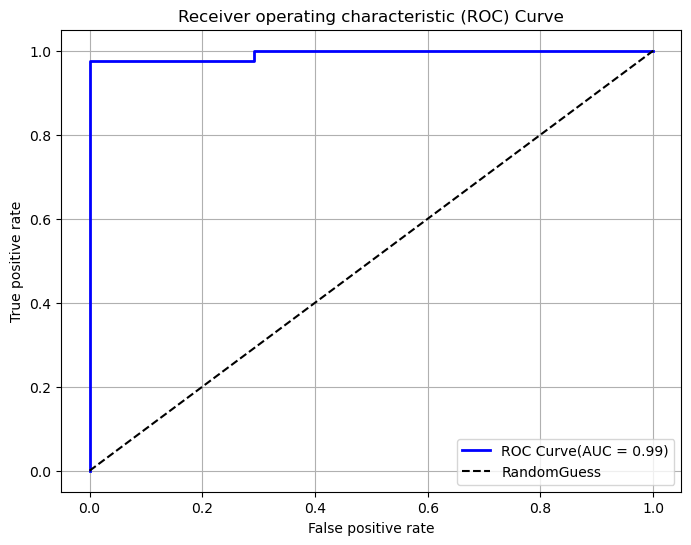

In [28]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label = f'ROC Curve(AUC = {roc_auc:.2f})', color='blue', linewidth=2)
plt.plot([0,1],[0,1],'k--', label='RandomGuess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()